# ディープラーニングとは?
---

本講座の目的は「ディープラーニングの実装を学ぶこと」だ。

詳細を学び始める前にディープラーニングが生い立ちや枠組み等の概要を抑えておこう。

## この単元の目標

* ディープラーニングの周辺知識を学ぶ
* 機械学習の概念を学ぶ

  → **機械学習の概要を大まかに理解しよう**





## 人工知能・機械学習・ディープラーニング
---

そもそも、**ディープラーニング**は人工知能(AI)の手法の一つ。  
AIの定義は明確に定まっていませんが、本講座では日本ディープラーニング協会のAI表現を引用すると、
> AIとは「人間の脳が行う認知・判断などの知的な活動を人工的につくられたシステムを用いて実現する技術」

と表現できる。

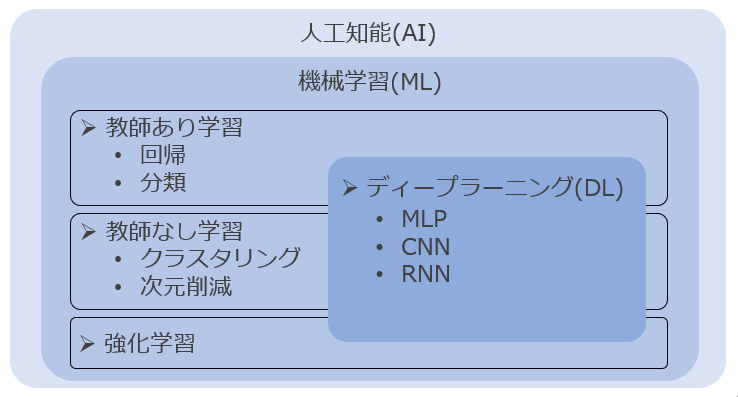

AIを実現する技術の代表が機械学習だ。  
**機械学習**とは、「機械が膨大な量のデータを解析することで、ルールやパターンを発見し人間の脳の代わりに認知・判断する手法」だ。

機械学習は大きく３つに分類される
* 教師あり学習：膨大な量の正解ラベル付きのデータを**学習**することで、正解がついていないデータを予測する
* 教師なし学習：用意したデータを解析してグループ分けや簡略化を行い、データを小さくわかりやすくまとめる
* 強化学習：機械がとった行動に対し賞罰を与えることで、機械が試行錯誤を行い問題を解決する

(世の中の課題は「教師あり学習」で対応できることが多く、機械学習を行う≒「教師あり学習」なところがある。本講座でも「教師あり学習」を実装するぞ！)

機械学習では、発見した特徴量(パターンやルールなど)の重要度を**人間**が判断・調節することで、認知・判断の精度を向上させてきた。

この特徴量の判断・調節すら、機械に任せてしまう機械学習手法がディープラーニングだ。

---
【例題】ディープラーニング手法が使われる可能性があるのは「教師あり学習・教師なし学習・強化学習」のうちどれ？

【答え】ディープラーニングは、教師あり学習・教師なし学習・強化学習のどれでも使われる手法だ。

【解説】図の通り、ディープラーニングはどれにも適応できる手法。

### 教師あり学習とは？

実装する「教師あり学習」についてイメージを掴んでおこう。

教師あり学習では**正解ラベル**付きのデータを用いて学習を行うのが特徴だ。  

#### 正解ラベルとは？
例えば、画像データの正解ラベルは以下のようになる。

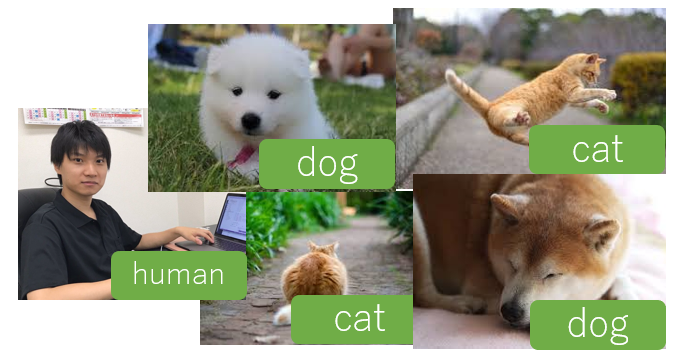

つまり、**(正解)ラベル付きデータ**というのは、データとデータが何を表しているのか分類するラベル付属したデータだ。

教師あり学習は、膨大な量の**ラベル付きデータ**からラベル別の特徴(ルールやパターン)を学習することで、様々なタスクの正解を**予測**する。

教師あり学習の事例としては、  
* 回帰問題の場合：売上や気温などの数字(連続値)を予測する
* 分類問題の場合：メールのスパム判定や画像などのカテゴリー(不連続値)を予測する

などがある。

---
【例題】画像になんの数字が写っている判断したい。これは回帰・分類問題のどちらにあてはまるでしょうか？

【答え】分類問題

【解説】画像を入力して「0 or 1 or 2 or 3 or 4 or 5 or 6 or 7 or 8 or 9」を分類する問題だ。数字を扱うが回帰問題ではないぞ。

## 本講座の実装課題
---

本講座では、次のタスクの解決を通して、ディープラーニングの実装を学んでいくぞ。

* タスクの内容：画像に写っている１文字の数字を何か判定する
    * 用意したデータ：60,000枚の数字が写ったラベル付きの画像データ(MNISTデータセット)  
    * 目的：判定精度を重視する

### 用意したデータについて(MNISTデータセット)
今回利用するデータについてイメージを掴んでおこう。

MNISTとは、数字が写った画像60,000枚のデータセットだ。つまり、**画像データ**と**正解ラベル**のセットが60,000コある。
* 画像データ：0\~9が書かれた28\*28画素、各画素は白黒の濃度を表す0\~255の整数
* 正解ラベル：画像に書かれた数字の正解に当たる0~9の整数

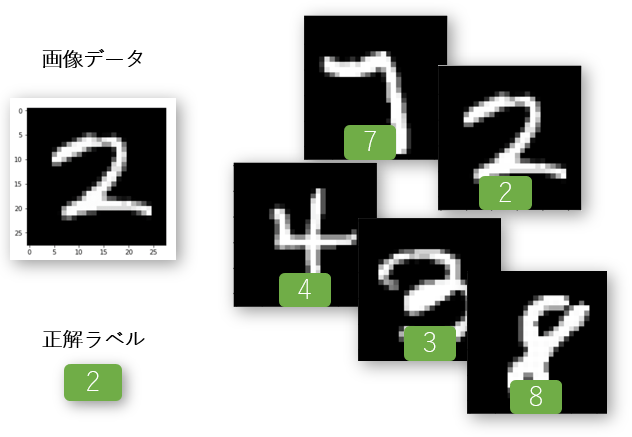

このようなデータを利用して、今後の実装及び説明を進めていくぞ！

## 機械学習(モデル開発)の流れ
---

ここからは機械学習の流れを見ていこう。

### モデルとは?

下図のように入力を処理して出力を生成する一連のシステムのことを機械学習では**モデル**と呼ぶ。  

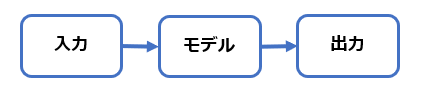

学習前のモデルは入力を与えてもデタラメの出力(認知・判断)を返すポンコツモデルだ。  

そこで機械学習では次の手順でポンコツモデルを良いモデルへと変貌させていく。

1. アルゴリズムの選択
2. 前処理
3. モデルの学習
4. 評価・検証

この後の章で一つずつ順に解説していく。



#### ※「良い」モデルとは？

「**未知のデータ**に対する予測精度(能力)が高いモデル」が「良い」モデルといえる。  

※この時点で「良い」モデルの意味を理解できなくても大丈夫。この単元を一通り読み終える頃には理解できるようになるはずだ。

## 1. アルゴリズムの選択
---

機械学習では**タスクの内容**、**用意したデータ**や**利用目的**などの条件に応じて適切なアルゴリズムの選択が必要だ。  

本講座の条件(再掲載)では
> * タスクの内容：画像に写っている１文字の数字を何か判定する
    * 用意したデータ：60,000枚の手書き数字が写ったラベル付きの画像データ(MNISTデータセット)  
    * 目的：精度を重視する

教師あり学習の分類問題だと定義することができ、アルゴリズムには**ディープラーニング**を用いることで高い精度を発揮すると考えた！


(本講座では、「ディープラーニングの実装」を学ぶことが目的なので、詳しいアルゴリズムの選択方法は説明しない。  
しかし、ディープラーニング以外にも様々な手法が有るため、条件に応じて適切な手法を選ぶ必要があることを頭に入れておこう。  
興味のある人は「機械学習 アルゴリズム チートシート」などで検索すると良い。)



## 2. データの前処理
---

前処理では、次ステップの**モデルの学習**を行いやすくする様に、用意したデータに処理を加えることだ。  

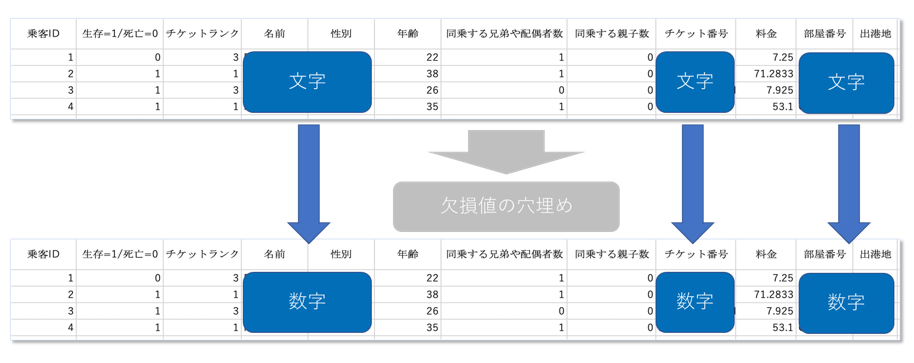

機械学習で扱うデータは、アンケートやセンサーなどを通じて集めるものが多い。  
このようなデータには入力ミスや機械の故障が原因の**欠損値**や**異常値**が生じていることがある。  
また、コンピュータは数値以外のデータを処理することができないので、データを数値化する処理も必要になる。

前処理は、上記のようなデータを編集・削除して、モデルの学習がより良く行われるように処理を行う過程だが、  
本講座で取り扱うデータ「MNIST」は前処理済みのデータとなっているため、本講座では前処理を省く。

## 3. モデルの学習
---
このステップではモデルが正しい**予測**ができるようにモデルの学習を行う。

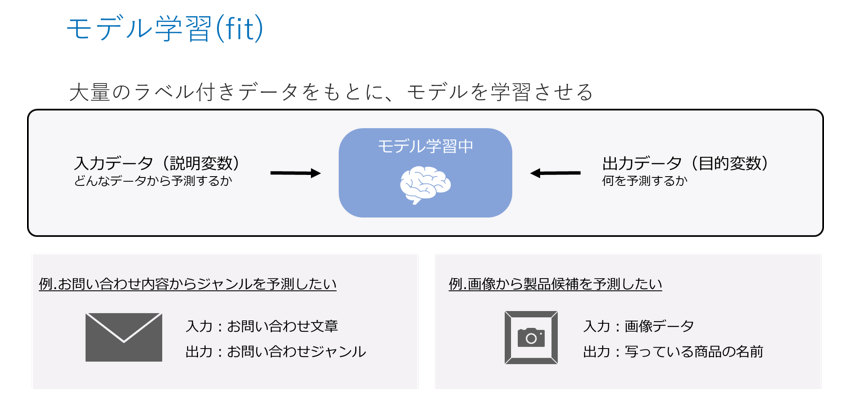

モデルに大量のデータを**何度も**入力することでモデルは特徴や傾向を学習していく。

例. 入力のメールを見る→ジャンルを予測→答え合わせ→メールの傾向を学習する  
例. 入力の画像を見る→商品名を予測→答え合わせ→画像の傾向を学習する

## 4. 評価・検証
---
このステップでは**検証用データ(学習に使ってない未知のデータ)**と**学習済みのモデル**を利用して、モデルが正しい**予測**をするか評価を行う。  

例. 新たな入力メールを見る→メールの傾向を学習したモデルでジャンルの予測→答え合わせ(予測結果の提示)  
例. 新たな入力画像を見る→画像の傾向を学習したモデルで商品名を予測→答え合わせ(予測結果の提示)  

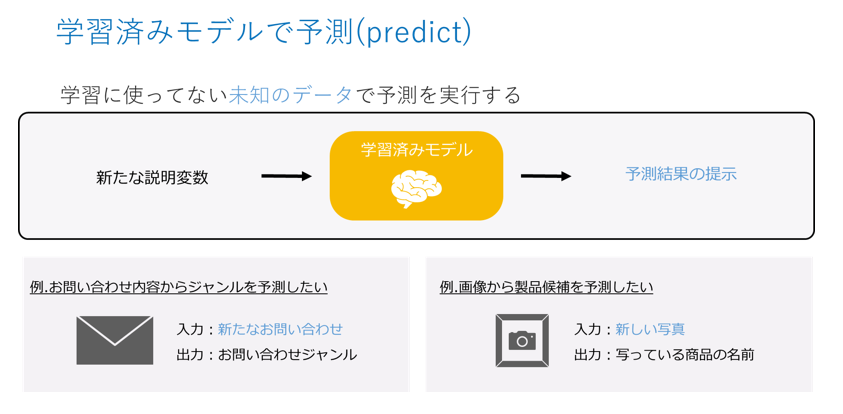

学習に使っていない未知のデータで予測する理由は**過学習**を回避するためだ。

**過学習**とは、学習に利用したデータに最適化し過ぎることで、実践には役立たないモデルになってしまうことを指す。

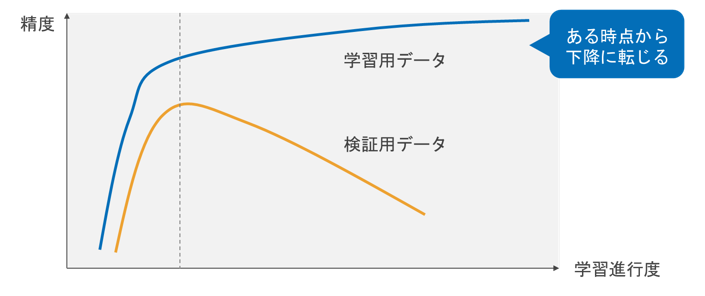

上記の図は学習進行度と精度の関係をグラフにしたものだ。

学習が進むにつれて、学習用データに対しての予測精度は上がり続けるが、検証用データ(未知のデータ)に対しての予測精度は下がることが読み取れる。

**過学習**を回避するためには、次のような対策が必要だ
* 過学習が始まったら学習を打ち切る
* 過学習を察するための検証を行うために、用意したデータを学習用データと検証用データに分ける

他にも様々な過学習回避の対策はあるが、上記の2つは常時必要な最低限の対策として覚えておこう。

## まとめ
機械学習のおおまかな概念について学んだ。

機械学習は一般に４つの手順を踏む。

1. アルゴリズムの選択
2. 前処理
3. モデルの学習
4. 評価・検証

実装時には**過学習**しないように以下の２点の対策が必須。
* 過学習が始まったら学習を打ち切る
* 過学習を察するための検証を行うために、用意したデータを学習用データと検証用データに分ける

また本講座では、機械学習の教師あり学習(分類)問題をディープラーニングを利用して解いていくぞ！


## 次単元からの内容
ディープラーニングを使用することが決まっているので「1.アルゴリズムの選択」は終了。  
MNISTデータを用いるため、「2.前処理」は必要ない。

次単元では、ディープラーニングにおける「3.モデルの学習」について詳しく学んでいくぞ！
